In [ ]:
pip install yfinance

In [1]:
from helpers import *
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
from datetime import date, timedelta, datetime

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
from options_helpers import *
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import CubicSpline

In [3]:
annualized_rate = .05374
ir = np.log(1+annualized_rate)

In [ ]:
cur_ndx_val = float(yf.Ticker('^NDX').history(period='1m').tail()['Close'])
cur_spx_val = float(yf.Ticker('^SPX').history(period='1m').tail()['Close'])

In [ ]:
ndx_itm, ndx_otm, spx_itm, spx_otm = get_delayed_options_data(date.today() + timedelta(days=1))

In [ ]:
ndx_otm[100:150]

In [ ]:
threshold = .05

spx_itm_temp = spx_itm[(spx_itm['strike']>cur_spx_val*(1-threshold)) & (spx_itm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_dist_dict = {}
for idx, row in spx_itm_temp.iterrows():
    if idx == 0 or idx == spx_itm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_itm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_itm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_itm_temp.iloc[idx-1]['midprice']) + float(spx_itm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
i = 0
for k, v in spx_dist_dict.items():
    spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
    i+=1


ndx_itm_temp = ndx_itm[(ndx_itm['strike']>cur_ndx_val*(1-threshold)) & (ndx_itm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
ndx_dist_dict = {}
for idx, row in ndx_itm_temp.iterrows():
    if idx == 0 or idx == ndx_itm_temp.shape[0]-1:
        continue
    prev_strike = float(ndx_itm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(ndx_itm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(ndx_itm_temp.iloc[idx-1]['midprice']) + float(ndx_itm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    ndx_dist_dict[cur_strike] = max(0,p)
    
ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
i = 0
for k, v in ndx_dist_dict.items():
    ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
    i+=1

        

In [ ]:
plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
plt.title('SPX ITM implied pdf')

In [ ]:
#P(SPX > 250 eod tommorrow?)
tups = [(sp, prob) for sp, prob in spx_dist_dict.items()]
tups.sort(key=lambda x:x[0])
cumsum = 0
for x in tups:
    if x[0] < 5160:
        cumsum+=x[1]
    else:
        print(cumsum)
        break

In [ ]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX ITM implied pdf')

In [ ]:
threshold = .05

spx_otm_temp = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_dist_dict = {}
for idx, row in spx_otm_temp.iterrows():
    if idx == 0 or idx == spx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_otm_temp.iloc[idx-1]['midprice']) + float(spx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

In [ ]:
spx_dist_dict

In [ ]:
spx_otm_temp.iloc[40:75]

In [ ]:
threshold = .05

spx_otm_temp = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_dist_dict = {}
for idx, row in spx_otm_temp.iterrows():
    if idx == 0 or idx == spx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_otm_temp.iloc[idx-1]['midprice']) + float(spx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
i = 0
for k, v in spx_dist_dict.items():
    spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
    i+=1
print(sum(spx_probs_smoothed))


ndx_otm_temp = ndx_otm[(ndx_otm['strike']>cur_ndx_val*(1-threshold)) & (ndx_otm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
ndx_dist_dict = {}
for idx, row in ndx_otm_temp.iterrows():
    if idx == 0 or idx == ndx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(ndx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(ndx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(ndx_otm_temp.iloc[idx-1]['midprice']) + float(ndx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    ndx_dist_dict[cur_strike] = max(0,p)
    
ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
i = 0
for k, v in ndx_dist_dict.items():
    ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
    i+=1
print(sum(ndx_probs_smoothed))
        

In [ ]:
plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
plt.title('SPX OTM implied pdf')

In [ ]:
#P(SPX > 5250 eod tommorrow?)
tups = [(sp, prob) for sp, prob in spx_dist_dict.items()]
tups.sort(key=lambda x:x[0])
cumsum = 0
for x in tups:
    if x[0] < 5125:
        cumsum+=x[1]
    else:
        print(cumsum)
        break

In [ ]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX OTM implied pdf')

In [ ]:
threshold = .025

spx_otm_temp = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_otm_temp['est_iv'] = spx_otm_temp.apply(lambda x: find_vol_put(x['midprice'], cur_spx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_spx_val, x['strike'], 1/252, r), axis=1)

spx_otm_temp_iv = spx_otm_temp['est_iv']
min_strike = spx_otm_temp['strike'].describe()['min']
max_strike = spx_otm_temp['strike'].describe()['max']
cs = CubicSpline(list(spx_otm_temp['strike']), spx_otm_temp_iv)
sp_in_data = list(spx_otm_temp['strike'])
x = np.linspace(min_strike, max_strike, int(max_strike - min_strike + 1))
iv_interp = cs(x)
prices_interp = []
for i in range(x.shape[0]):
    sp = x[i]
    if sp in sp_in_data:
        prices_interp.append(float(spx_otm_temp[spx_otm_temp['strike']==sp]['midprice']))
        continue
    iv = iv_interp[i]
    if sp > cur_spx_val:
        cur_price = bs_call(cur_spx_val, sp, 1/252, r, iv)
    else:
        cur_price = bs_put(cur_spx_val, sp, 1/252, r, iv)
        
    prices_interp.append(cur_price)

spx_otm_temp = pd.DataFrame({'strike': x, 'midprice': prices_interp})



spx_dist_dict = {}
for idx, row in spx_otm_temp.iterrows():
    if idx == 0 or idx == spx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_otm_temp.iloc[idx-1]['midprice']) + float(spx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
i = 0
for k, v in spx_dist_dict.items():
    spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
    i+=1


ndx_otm_temp = ndx_otm[(ndx_otm['strike']>cur_ndx_val*(1-threshold)) & (ndx_otm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
ndx_otm_temp['est_iv'] = ndx_otm_temp.apply(lambda x: find_vol_put(x['midprice'], cur_ndx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_ndx_val, x['strike'], 1/252, r), axis=1)

ndx_otm_temp_iv = ndx_otm_temp['est_iv']
min_strike = ndx_otm_temp['strike'].describe()['min']
max_strike = ndx_otm_temp['strike'].describe()['max']
cs = CubicSpline(list(ndx_otm_temp['strike']), ndx_otm_temp_iv)
sp_in_data = list(ndx_otm_temp['strike'])
x = np.linspace(min_strike, max_strike, int(max_strike - min_strike + 1))
iv_interp = cs(x)
prices_interp = []
for i in range(x.shape[0]):
    sp = x[i]
    if sp in sp_in_data:
        prices_interp.append(float(ndx_otm_temp[ndx_otm_temp['strike']==sp]['midprice']))
        continue
    iv = iv_interp[i]
    if sp > cur_ndx_val:
        cur_price = bs_call(cur_ndx_val, sp, 1/252, r, iv)
    else:
        cur_price = bs_put(cur_ndx_val, sp, 1/252, r, iv)
        
    prices_interp.append(cur_price)

ndx_otm_temp = pd.DataFrame({'strike': x, 'midprice': prices_interp})
    
ndx_dist_dict = {}
for idx, row in ndx_otm_temp.iterrows():
    if idx == 0 or idx == ndx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(ndx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(ndx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(ndx_otm_temp.iloc[idx-1]['midprice']) + float(ndx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    ndx_dist_dict[cur_strike] = max(0,p)
    
ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
i = 0
for k, v in ndx_dist_dict.items():
    ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
    i+=1

        

In [ ]:
plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
plt.title('SPX OTM implied pdf with estimated iv')

In [ ]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX OTM implied pdf with estimated IV')
plt.show()

In [ ]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX OTM implied pdf')
plt.show()

In [ ]:
plt.scatter(spx_otm_temp['strike'], spx_otm_temp['midprice'])

In [ ]:
plt.scatter(ndx_otm_temp['strike'], ndx_otm_temp['midprice'])

In [ ]:
ndx_otm_temp.iloc[200:230]

In [ ]:
ndx_otm_temp

In [ ]:
toy = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
toy['est_iv'] = toy.apply(lambda x: find_vol_put(x['midprice'], cur_spx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_spx_val, x['strike'], 1/252, r), axis=1)
toy

In [ ]:
toy = ndx_otm[(ndx_otm['strike']>cur_ndx_val*(1-threshold)) & (ndx_otm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
toy['est_iv'] = toy.apply(lambda x: find_vol_put(x['midprice'], cur_ndx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_ndx_val, x['strike'], 1/252, r), axis=1)
toy

In [ ]:
toy.iloc[15:40]

In [ ]:
import requests

url = 'https://api.polygon.io/v2/aggs/ticker/{}/range/{}/{}/{}/{}'.format('O:SPXW240314C05170000', '1', 'hour', '2024-03-13', '2024-03-13')
params_ = {'adjusted': 'true', 'sort': 'asc', 'apiKey' : 'vGQU0FoV2y68f1aA4hFlncpgRNiJVroO'}
r = requests.get(url, params=params_)


In [ ]:
r.json()

In [ ]:
datetime.fromtimestamp(1710356400000/1000)

In [ ]:
from helpers import *

In [4]:
ndx_df, spx_df = get_ndx_spx_data()

In [ ]:
ndx_df, spx_df = get_ndx_spx_data()
ndx_df = ndx_df[ndx_df['Date'] >= date(2024, 1, 1)][['Date', 'Open']].reset_index(drop=True)
spx_df = spx_df[spx_df['Date'] >= date(2024, 1, 1)][['Date', 'Open']].reset_index(drop=True)

In [41]:
'''
gets hourly SPX and NDX options data on an hourly basis from some specified date onwards from Polygon and stores data in df
'''
import requests
params_ = {'adjusted': 'true', 'sort': 'asc', 'apiKey' : 'vGQU0FoV2y68f1aA4hFlncpgRNiJVroO'}
d = {'underlying': [], 'strike': [], 'type': [], 'date': [], 'ts': [], 'price': []}

ndx_df, spx_df = get_ndx_spx_data()
    
ndx_df = ndx_df[(ndx_df['Date'] >= date(2024, 3, 18)) & (ndx_df['Date'] <= date(2024, 3, 18))][['Date', 'Open', 'Close']].reset_index(drop=True)
spx_df = spx_df[(spx_df['Date'] >= date(2024, 3, 18)) & (spx_df['Date']<= date(2024, 3, 18))][['Date', 'Open', 'Close']].reset_index(drop=True) #get daily index data for 2024 onwards

exception_rate = []

# -- NDX below --

for idx, row in ndx_df.iterrows():
    cur_dt = date.today()
    year = str(cur_dt.year - 2000)
    month = cur_dt.month
    if month < 10:
        month = '0' + str(month)
    else:
        month = str(month)
    day = cur_dt.day + 1
    if day < 10:
        day = '0' + str(day)
    else:
        day = str(day)
        
    open_ = row['Open']
    #get OTM calls and puts data
    lb_call_strike = open_ + 10 - open_ % 10
    ub_put_strike = open_ - open_ % 10
    call_strikes = np.arange(lb_call_strike, lb_call_strike + 500, 10)
    put_strikes = np.arange(ub_put_strike - 500, ub_put_strike + 10, 10)
    strikes = list(call_strikes) + list(put_strikes)
    day_data_ret_err = 0
    for sp in strikes:

        put_ticker = 'NDXP' + year + month + day + 'P' +  str(int(sp)) + '000'
        call_ticker = 'NDXP'+ year + month + day + 'C' + str(int(sp)) + '000'
        put_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(put_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        call_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(call_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        
        r = requests.get(put_url, params=params_).json()
        try:
            for res in r['results']:
                option_close = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('NDX')
                d['type'].append('put')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['price'].append(option_close)
        except:
            day_data_ret_err += 1
            
        r = requests.get(call_url, params=params_).json()
        try:
            for res in r['results']:
                option_close = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('NDX')
                d['type'].append('call')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['price'].append(option_close)
        except:
            day_data_ret_err += 1
        
        
    if day_data_ret_err > 0:
        exception_rate.append(day_data_ret_err/(2*len(strikes)))

# -- SPX below --

for idx, row in spx_df.iterrows():
    cur_dt = row['Date']
    year = str(cur_dt.year - 2000)
    month = cur_dt.month
    if month < 10:
        month = '0' + str(month)
    else:
        month = str(month)
    day = cur_dt.day
    if day < 10:
        day = '0' + str(day)
    else:
        day = str(day)
        
    open_ = row['Open']
    #get OTM calls and puts data
    lb_call_strike = open_ + 5 - open_ % 5
    ub_put_strike = open_ - open_ % 5
    call_strikes = np.arange(lb_call_strike, lb_call_strike + 155, 5)
    put_strikes = np.arange(ub_put_strike - 150, ub_put_strike + 5, 5)
    strikes = list(call_strikes) + list(put_strikes)
    day_data_ret_err = 0
    for sp in strikes:

        put_ticker = 'SPXW' + year + month + day + 'P' + '0' + str(int(sp)) + '000'
        call_ticker = 'SPXW'+ year + month + day + 'C' + '0' + str(int(sp)) + '000'
        put_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(put_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        call_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(call_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        
        r = requests.get(put_url, params=params_).json()
        try:
            for res in r['results']:
                option_close = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('SPX')
                d['type'].append('put')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['price'].append(option_close)
        except:
            day_data_ret_err += 1
            
        r = requests.get(call_url, params=params_).json()
        try:
            for res in r['results']:
                option_close = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('SPX')
                d['type'].append('call')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['price'].append(option_close)
        except:
            day_data_ret_err += 1
        
        
    if day_data_ret_err > 0:
        exception_rate.append(day_data_ret_err/(2*len(strikes)))

print(sum(exception_rate)/len(exception_rate))
df = pd.DataFrame(data=d)

ndx_opt_data = df[df['underlying'] == 'NDX']
spx_opt_data = df[df['underlying'] == 'SPX']
ndx_df['date'] = ndx_df.apply(lambda x: x['Date'], axis=1)
spx_df['date'] = spx_df.apply(lambda x: x['Date'], axis=1)

ndx_df = ndx_df[['date', 'Open', 'Close']]
spx_df = spx_df[['date', 'Open', 'Close']]

ndx_opt_data = ndx_opt_data.merge(ndx_df, how='inner', on='date')
ndx_itm_data = ndx_opt_data[((ndx_opt_data['strike'] > ndx_opt_data['Open']) & (ndx_opt_data['type']=='put')) | ((ndx_opt_data['strike'] < ndx_opt_data['Open']) & (ndx_opt_data['type']=='call'))]
ndx_otm_data = ndx_opt_data[((ndx_opt_data['strike'] > ndx_opt_data['Open']) & (ndx_opt_data['type']=='call')) | ((ndx_opt_data['strike'] < ndx_opt_data['Open']) & (ndx_opt_data['type']=='put'))]

spx_opt_data = spx_opt_data.merge(spx_df, how='inner', on='date')
spx_itm_data = spx_opt_data[((spx_opt_data['strike'] > spx_opt_data['Open']) & (spx_opt_data['type']=='put')) | ((spx_opt_data['strike'] < spx_opt_data['Open']) & (spx_opt_data['type']=='call'))]
spx_otm_data = spx_opt_data[((spx_opt_data['strike'] > spx_opt_data['Open']) & (spx_opt_data['type']=='call')) | ((spx_opt_data['strike'] < spx_opt_data['Open']) & (spx_opt_data['type']=='put'))]


df_itm = pd.concat([ndx_itm_data, spx_itm_data])
df_otm = pd.concat([ndx_otm_data, spx_otm_data])
df_itm['hour'] = df_itm.apply(lambda x: x['ts'].hour, axis=1)
df_otm['hour'] = df_otm.apply(lambda x: x['ts'].hour, axis=1)

df_itm = df_itm[df_itm['hour']==9]
df_otm = df_otm[df_otm['hour']==9]

df_itm = df_itm.sort_values(by=['date', 'strike']).reset_index(drop=True)
df_otm = df_otm.sort_values(by=['date', 'strike']).reset_index(drop=True)


0.1647237304375599


In [24]:
df_itm

,underlying,strike,type,date,ts,price,Open,Close,hour
0,SPX,5035,call,2024-03-14,2024-03-14 15:00:00,105.38,5175.140137,5150.479980,15
1,SPX,5040,call,2024-03-14,2024-03-14 15:00:00,105.00,5175.140137,5150.479980,15
2,SPX,5045,call,2024-03-14,2024-03-14 15:00:00,95.10,5175.140137,5150.479980,15
3,SPX,5050,call,2024-03-14,2024-03-14 15:00:00,88.66,5175.140137,5150.479980,15
4,SPX,5070,call,2024-03-14,2024-03-14 15:00:00,65.60,5175.140137,5150.479980,15
...,...,...,...,...,...,...,...,...,...
73,NDX,18220,put,2024-03-14,2024-03-14 15:00:00,286.14,18114.699219,18014.806641,15
74,NDX,18250,put,2024-03-14,2024-03-14 15:00:00,240.00,18114.699219,18014.806641,15
75,NDX,18260,put,2024-03-14,2024-03-14 15:00:00,339.71,18114.699219,18014.806641,15
76,NDX,18300,put,2024-03-14,2024-03-14 15:00:00,310.93,18114.699219,18014.806641,15


In [33]:
df_otm.iloc[25:]

,underlying,strike,type,date,ts,price,Open,Close,hour
25,SPX,5155,call,2024-03-14,2024-03-14 15:00:00,0.08,5175.140137,5150.479980,15
26,SPX,5160,call,2024-03-14,2024-03-14 15:00:00,0.05,5175.140137,5150.479980,15
27,SPX,5165,call,2024-03-14,2024-03-14 15:00:00,0.05,5175.140137,5150.479980,15
28,SPX,5170,call,2024-03-14,2024-03-14 15:00:00,0.05,5175.140137,5150.479980,15
29,SPX,5175,call,2024-03-14,2024-03-14 15:00:00,0.05,5175.140137,5150.479980,15
...,...,...,...,...,...,...,...,...,...
120,NDX,18500,call,2024-03-14,2024-03-14 15:00:00,0.05,18114.699219,18014.806641,15
121,NDX,18550,call,2024-03-14,2024-03-14 15:00:00,0.05,18114.699219,18014.806641,15
122,NDX,18560,call,2024-03-14,2024-03-14 15:00:00,0.05,18114.699219,18014.806641,15
123,NDX,18570,call,2024-03-14,2024-03-14 15:00:00,0.05,18114.699219,18014.806641,15


In [42]:
# calc_geq_strike_prob(S_0, K, r, sigma, T)
df_otm['est_iv'] = df_otm.apply(lambda x: implied_volatility_call(x['price'], x['Close'], x['strike'], 1/252, ir) if x['type']=='call' else implied_volatility_put(x['price'], x['Close'], x['strike'], 1/252, ir) , axis=1)

spx_prob_df = df_otm[df_otm['underlying']=='SPX'][['Close', 'strike', 'est_iv']]
spx_prob_df['p_geq_strike'] = spx_prob_df.apply(lambda x: calc_geq_strike_prob(x['Close'], x['strike'], ir, x['est_iv'], 1/252), axis=1)

ndx_prob_df = df_otm[df_otm['underlying']=='NDX'][['Close', 'strike', 'est_iv']]
ndx_prob_df['p_geq_strike'] = ndx_prob_df.apply(lambda x: calc_geq_strike_prob(x['Close'], x['strike'], ir, x['est_iv'], 1/252), axis=1)



found on 6th iteration
difference is equal to 8.080025104814648e-06
found on 6th iteration
difference is equal to 1.2496006832660167e-05
found on 6th iteration
difference is equal to 1.850743359525786e-05
found on 6th iteration
difference is equal to 2.6337814699670115e-05
found on 6th iteration
difference is equal to 3.611593180678774e-05
found on 6th iteration
difference is equal to 4.7833203130662194e-05
found on 6th iteration
difference is equal to 1.4679203897138837e-05
found on 6th iteration
difference is equal to 1.9200862539314745e-05
found on 6th iteration
difference is equal to 9.1766478043806e-05
found on 6th iteration
difference is equal to 4.9663532749322226e-06
found on 6th iteration
difference is equal to 3.44117483950801e-05
found on 6th iteration
difference is equal to 2.4583556569313103e-06
found on 6th iteration
difference is equal to 7.841203883168779e-06
found on 6th iteration
difference is equal to 6.865713317039113e-07
found on 6th iteration
difference is equal t

/Users/irfanjamil/kalshi_mm/options_helpers.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = sigma - diff / vega(S, K, T, r, sigma)
/Users/irfanjamil/kalshi_mm/options_helpers.py:46: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
/Users/irfanjamil/kalshi_mm/options_helpers.py:65: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))


found on 3th iteration
difference is equal to 7.876464680478534e-07
found on 3th iteration
difference is equal to 1.6563095823762808e-05
found on 4th iteration
difference is equal to 1.8107355614915832e-09
found on 4th iteration
difference is equal to 2.283831737059927e-07
found on 4th iteration
difference is equal to 5.86417238546133e-06
found on 4th iteration
difference is equal to 7.500129859172588e-05
found on 5th iteration
difference is equal to 1.3481978844431808e-07
found on 5th iteration
difference is equal to 3.797079915546231e-06
found on 5th iteration
difference is equal to 3.647233250775317e-05
found on 6th iteration
difference is equal to 6.257677681587026e-08
found on 6th iteration
difference is equal to 4.944141379636946e-08
found on 6th iteration
difference is equal to 3.88553628744015e-07
found on 6th iteration
difference is equal to 2.6094441175239513e-05
found on 6th iteration
difference is equal to 3.247964956182292e-06
found on 6th iteration
difference is equal to 

In [43]:
df_otm[(df_otm['underlying']=='NDX') & (df_otm['strike']<18050)]

,underlying,strike,type,date,ts,price,Open,Close,hour,est_iv
58,NDX,17610,put,2024-03-14,2024-03-14 09:00:00,0.30,18114.699219,18014.806641,9,0.144192
59,NDX,17620,put,2024-03-14,2024-03-14 09:00:00,1.65,18114.699219,18014.806641,9,0.176842
60,NDX,17630,put,2024-03-14,2024-03-14 09:00:00,1.75,18114.699219,18014.806641,9,0.174663
61,NDX,17640,put,2024-03-14,2024-03-14 09:00:00,1.22,18114.699219,18014.806641,9,0.161587
62,NDX,17650,put,2024-03-14,2024-03-14 09:00:00,0.40,18114.699219,18014.806641,9,0.135980
63,NDX,17660,put,2024-03-14,2024-03-14 09:00:00,2.28,18114.699219,18014.806641,9,0.170498
64,NDX,17670,put,2024-03-14,2024-03-14 09:00:00,0.60,18114.699219,18014.806641,9,0.136202
65,NDX,17680,put,2024-03-14,2024-03-14 09:00:00,1.20,18114.699219,18014.806641,9,0.146423
66,NDX,17690,put,2024-03-14,2024-03-14 09:00:00,0.74,18114.699219,18014.806641,9,0.133043
67,NDX,17700,put,2024-03-14,2024-03-14 09:00:00,1.60,18114.699219,18014.806641,9,0.145447


In [44]:
df_otm[(df_otm['underlying']=='NDX') & (df_otm['strike']==18050)]

,underlying,strike,type,date,ts,price,Open,Close,hour,est_iv
102,NDX,18050,put,2024-03-14,2024-03-14 09:00:00,40.6,18114.699219,18014.806641,9,0.046973


In [48]:
ndx_prob_df.iloc[88:]

,Close,strike,est_iv,p_geq_strike
146,18014.806641,18520,0.165438,0.004156
147,18014.806641,18550,0.168388,0.003020
148,18014.806641,18600,0.180279,0.002537


In [7]:
spx_options_df = df[df['underlying']=='SPX'].reset_index(drop=True)
ndx_options_df = df[df['underlying']=='NDX'].reset_index(drop=True)

In [8]:
spx_options_df

,underlying,strike,type,date,ts,price,Open,Close,hour
0,SPX,5025,put,2024-03-14,2024-03-14 09:00:00,0.05,5175.140137,5150.47998,9
1,SPX,5030,put,2024-03-14,2024-03-14 09:00:00,0.05,5175.140137,5150.47998,9
2,SPX,5035,put,2024-03-14,2024-03-14 09:00:00,0.05,5175.140137,5150.47998,9
3,SPX,5040,put,2024-03-14,2024-03-14 09:00:00,0.05,5175.140137,5150.47998,9
4,SPX,5045,put,2024-03-14,2024-03-14 09:00:00,0.05,5175.140137,5150.47998,9
5,SPX,5050,put,2024-03-14,2024-03-14 09:00:00,0.05,5175.140137,5150.47998,9
6,SPX,5055,put,2024-03-14,2024-03-14 09:00:00,0.07,5175.140137,5150.47998,9
7,SPX,5060,put,2024-03-14,2024-03-14 09:00:00,0.07,5175.140137,5150.47998,9
8,SPX,5065,put,2024-03-14,2024-03-14 09:00:00,0.05,5175.140137,5150.47998,9
9,SPX,5070,put,2024-03-14,2024-03-14 09:00:00,0.10,5175.140137,5150.47998,9


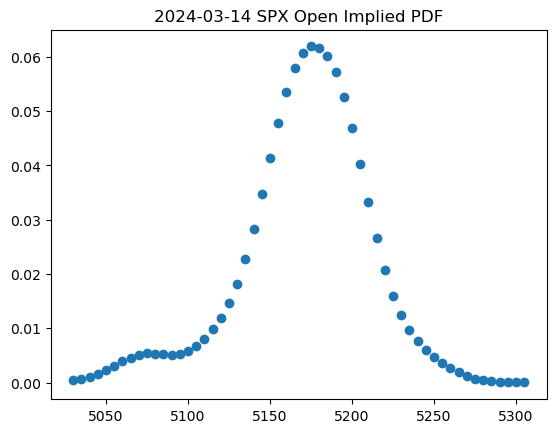

1.0179999999999996


In [10]:
'''
using Polygon options data, plots beginning of day implied pdf derived from 0dte option on SPX
'''
spx_dist_dict = {}
p = 0
for idx, row in spx_options_df.iterrows():
    if idx == 0 or idx == spx_options_df.shape[0]-1:
        continue
    prev_strike = float(spx_options_df.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_options_df.iloc[idx+1]['strike'])

    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_options_df.iloc[idx-1]['price']) + float(spx_options_df.iloc[idx+1]['price']) - 2 * row['price']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
i = 0
for k, v in spx_dist_dict.items():
    spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
    i+=1
plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
plt.title('{} SPX Open Implied PDF'.format((date.today().isoformat())))
plt.show()
print(sum(spx_probs_smoothed))
#break

In [11]:
s = 0
for k, v in spx_dist_dict.items():
    if k >= 5150 and k <= 5175:
        s += v
print(s)

0.3232523437021417


In [12]:
s = 0
for k, v in spx_dist_dict.items():
    if k >= 5175 and k <= 5200:
        s += v
print(s)

0.34045313288777046


In [13]:
s = 0
for k, v in spx_dist_dict.items():
    if k >= 5100 and k <= 5125:
        s += v
print(s)

0.056976683242085616


In [14]:
ndx_options_df

,underlying,strike,type,date,ts,price,Open,Close,hour
0,NDX,17610,put,2024-03-14,2024-03-14 09:00:00,0.30,18114.699219,18014.806641,9
1,NDX,17620,put,2024-03-14,2024-03-14 09:00:00,1.65,18114.699219,18014.806641,9
2,NDX,17630,put,2024-03-14,2024-03-14 09:00:00,1.75,18114.699219,18014.806641,9
3,NDX,17640,put,2024-03-14,2024-03-14 09:00:00,1.22,18114.699219,18014.806641,9
4,NDX,17650,put,2024-03-14,2024-03-14 09:00:00,0.40,18114.699219,18014.806641,9
...,...,...,...,...,...,...,...,...,...
86,NDX,18490,call,2024-03-14,2024-03-14 09:00:00,0.45,18114.699219,18014.806641,9
87,NDX,18500,call,2024-03-14,2024-03-14 09:00:00,0.29,18114.699219,18014.806641,9
88,NDX,18520,call,2024-03-14,2024-03-14 09:00:00,0.25,18114.699219,18014.806641,9
89,NDX,18550,call,2024-03-14,2024-03-14 09:00:00,0.18,18114.699219,18014.806641,9


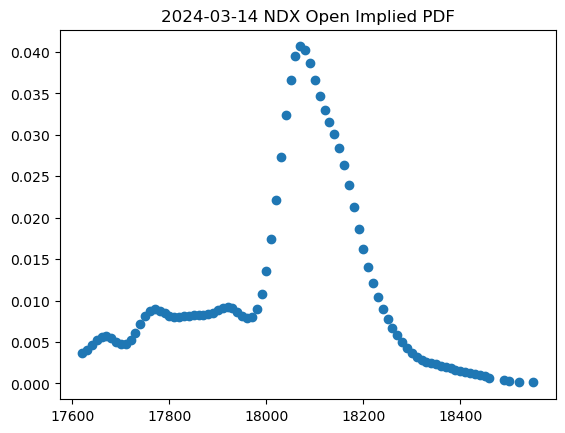

13.421000000000008


In [16]:
'''
using Polygon options data, plots beginning of day implied pdf derived from 0dte option on NDX
'''

ndx_dist_dict = {}
p = 0
for idx, row in ndx_options_df.iterrows():
    if idx == 0 or idx == ndx_options_df.shape[0]-1:
        continue
    prev_strike = float(ndx_options_df.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(ndx_options_df.iloc[idx+1]['strike'])

    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(ndx_options_df.iloc[idx-1]['price']) + float(ndx_options_df.iloc[idx+1]['price']) - 2 * row['price']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    ndx_dist_dict[cur_strike] = max(0,p)

ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
i = 0
for k, v in ndx_dist_dict.items():
    ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
    i+=1
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('{} NDX Open Implied PDF'.format((date.today().isoformat())))
plt.show()
print(sum(ndx_probs_smoothed))
#break

In [17]:
s = 0
for k, v in ndx_dist_dict.items():
    if k >= 18000 and k <= 18050:
        s += v
print(s)

0.14949645102692477


In [18]:
s = 0
for k, v in ndx_dist_dict.items():
    if k >= 18050 and k <= 18100:
        s += v
print(s)

0.23236065933757666


c = S_0 N(d1) - K * e^(-rT) * N(d2)

c = e^ (-rT) * E [max(S-K, 0)]
 = e ^ (-rT) * sum (p(Z) * (Z-k)) for Z > k
 = e ^ (-rT) * p (S > k) * E[S-K| S > K]
 = e ^ (-rT) * p(S > K) * (E[S| S > K] - K)
 = e ^ (-rT) * p(S > K) * (E[S| S > K]) - K * e ^ (-rT) * p(S > K)
 
 so p(S>K) ~=~ N(d2)
 where d2 = (ln(S_0/K) + (r-(sigma**2)/2) * T)/(sigma * sqrt(T))
 

In [20]:
def calc_geq_strike_prob(S_0, K, r, sigma, T):
    d2 = (np.log(S_0/K) + (r - (sigma**2)/2)*T)/(sigma * np.sqrt(T))
    return norm.cdf(d2)

In [22]:
calc_geq_strike_prob(5150.48, 5175, ir, implied_volatility_put(2.70, 5175.14, 5150, 1/252, ir), 1/252)

found on 4th iteration
difference is equal to 8.868982881438114e-09


0.20266711625770045

In [ ]:
r = np.log(1.05374)

In [ ]:
for idx, row in spx_df.iterrows():
    cur_dt = row['Date']
    open_ = row['Open'] - row['Open'] % 5
    close = row['Close']
    temp_calls = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='SPX') & (df['type']=='call') & (df['strike'] > open_)]
    temp_puts = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='SPX') & (df['type']=='put') & (df['strike'] < open_)]
    temp_df = pd.concat([temp_calls, temp_puts])
    temp_df = temp_df.sort_values(by=['strike']).reset_index(drop=True)
    temp_df['iv'] = temp_df.apply(lambda x: find_vol_call(x['open'],open_,x['strike'],1/252, r) if x['type'] == 'call' else find_vol_put(x['open'],open_,x['strike'],1/252, r), axis=1)
    spx_dist_dict = {}
    plt.scatter(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))
    plt.title('{} SPX Open Implied Vol'.format((cur_dt.isoformat())))
    plt.show()


In [ ]:
spx_df.iloc[-1]

In [ ]:
temp_df

In [ ]:
cs = CubicSpline(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))
temp_df['call_price'] = temp_df.apply(lambda x: bs_call(5164.459961, x['strike'], 1/252, r, x['iv']), axis=1)

In [ ]:
bs_call(5164.459961, 5205, 1/252, r,0.095062)

In [ ]:
plt.scatter(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))

In [ ]:
cs = CubicSpline(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))
x = np.arange(5000, 5301, 1)
iv_interp = cs(x)
y = []
for i in range(x.shape[0]):
    y.append(bs_call(5164.459961, x[i], 1/252, r, iv_interp[i]))

plt.plot(x, y)

In [ ]:
x[0], y[0]

In [ ]:
x[10], y[10]

In [ ]:
temp_df